In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house = cv2.imread('image/house.jpg')

In [5]:
cv2.KeyPoint?

Init signature: cv2.KeyPoint(self, /, *args, **kwargs)
Docstring:      <no docstring>
File:           ~/miniconda3/envs/dip/lib/python3.8/site-packages/cv2.cpython-38-x86_64-linux-gnu.so
Type:           type
Subclasses:     


In [6]:
cv2.drawKeypoints?

Docstring:
drawKeypoints(image, keypoints, outImage[, color[, flags]]) -> outImage
.   @brief Draws keypoints.
.   
.   @param image Source image.
.   @param keypoints Keypoints from the source image.
.   @param outImage Output image. Its content depends on the flags value defining what is drawn in the
.   output image. See possible flags bit values below.
.   @param color Color of keypoints.
.   @param flags Flags setting drawing features. Possible flags bit values are defined by
.   DrawMatchesFlags. See details above in drawMatches .
.   
.   @note
.   For Python API, flags are modified as cv.DRAW_MATCHES_FLAGS_DEFAULT,
.   cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, cv.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG,
.   cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
Type:      builtin_function_or_method


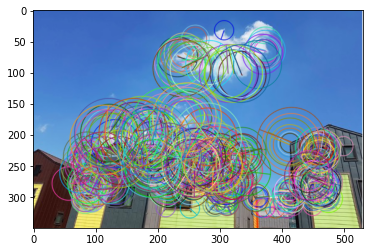

In [24]:
orb = cv2.ORB_create()
mask = np.ones_like(cv2.cvtColor(house, cv2.COLOR_BGR2GRAY))*255
# mask = np.ones_like(house)*255
mask.astype(np.uint8)

# keypoints, descriptor = orb.detectAndCompute(house, None)
keypoints, descriptor = orb.detectAndCompute(house, mask)

img_draw = cv2.drawKeypoints(house, keypoints, None,\
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_draw[:,:,::-1])

In [23]:
keypoints[0].pt

(307.0, 32.0)

matches:128


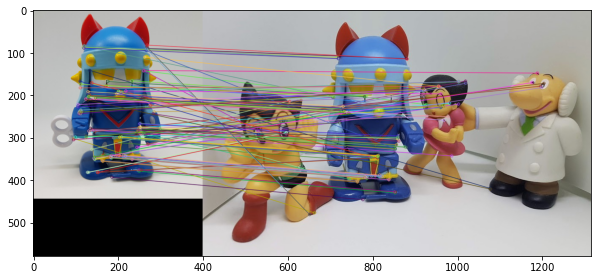

In [27]:
img1 = cv2.imread('image/taekwonv1.jpg')
img2 = cv2.imread('image/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = matcher.match(desc1, desc2)

print(f'matches:{len(matches)}')

res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None,\
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,5))
plt.imshow(res[:,:,::-1])

matches:30/500


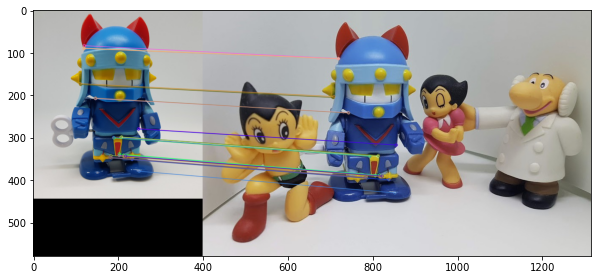

In [35]:
img1 = cv2.imread('image/taekwonv1.jpg')
img2 = cv2.imread('image/figures.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

matches = matcher.knnMatch(desc1, desc2, 2)

ratio = 0.75
good_matches = [first for first, second in matches \
    if first.distance < second.distance * ratio]

print(f'matches:{len(good_matches)}/{len(matches)}')

res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,\
    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(10,5))
plt.imshow(res[:,:,::-1])

In [30]:
good_matches[0]

<DMatch 0x7f94bdc58250>